In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy as np
from scipy.stats import multivariate_normal

# Make data.
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(X, Y)
x_y = np.dstack((X, Y))
Z = multivariate_normal(mean=[0,0], cov=np.array([[1, 0.5], [0.5, 1]]))

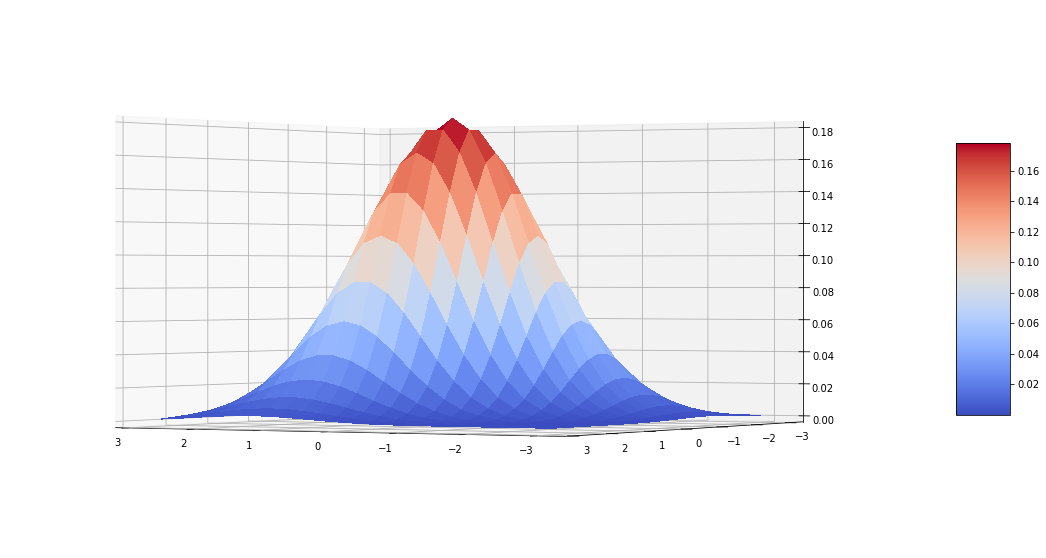

In [2]:
# Modified a template from matplotlib's gallery to create this graph.
# Plot the surface.
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z.pdf(x_y), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, .18)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
angle = 120 # Shift view here!
ax.view_init(0, angle)

plt.show()

In [3]:
# Took this function from matplotlib's gallery:
# https://matplotlib.org/3.1.0/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

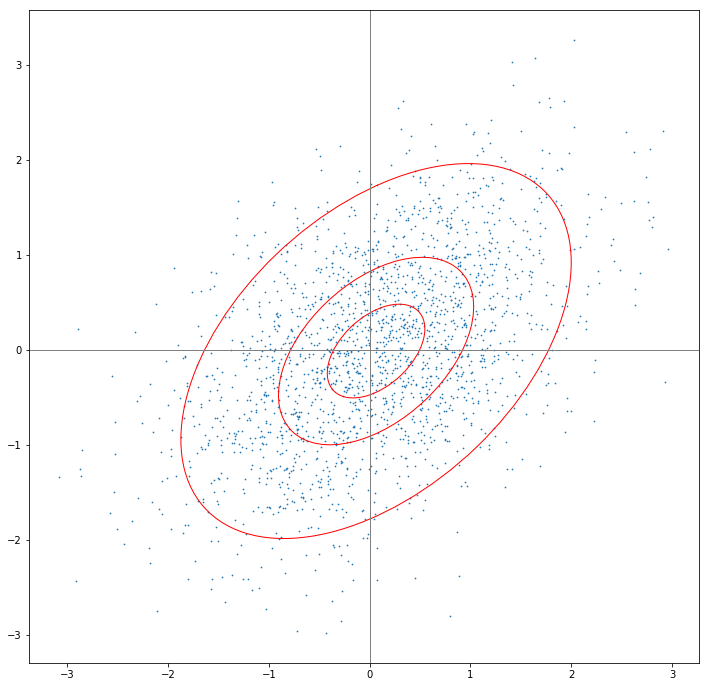

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

n_sample = 2000
bivariate_n_samples = Z.rvs(n_sample)
x = bivariate_n_samples[:,0]
y = bivariate_n_samples[:,1]
ax.scatter(x, y, s=0.5)

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

confidence_ellipse(x, y, ax, 1/2, edgecolor='red')
confidence_ellipse(x, y, ax, 1, edgecolor='red')
confidence_ellipse(x, y, ax, 2, edgecolor='red')

plt.show()